## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.precision',9)

In [3]:
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")
print(rounds2.shape)
rounds2.head()

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies = pd.read_csv('companies.txt', delimiter="\t", encoding="ISO-8859-1")
print(companies.shape)
companies.head()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
list1 = companies['permalink'].unique()
print(len(list1))

66368


In [6]:
list2 = rounds2['company_permalink'].unique()
print(len(list2))
print(len(companies['name'].unique()))

90247
66103


In [7]:
diff1 = list(set(list1)-set(list2))
diff2 = list(set(list2)-set(list1))

print("Companies - Rounds: ", len(diff1),"\n","Rounds - Companies: ", len(diff2))

Companies - Rounds:  66368 
 Rounds - Companies:  90247


In [8]:
diff = [item for item in list1 if item in list2]
print(len(diff))

0


In [9]:
rounds2 = rounds2.rename(columns={'company_permalink': 'permalink'})
rounds2['permalink'] = rounds2['permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

print(rounds2['permalink'].dtype)
print(companies['permalink'].dtype)

object
object


In [10]:
master_frame = pd.merge(rounds2, companies, how="left", on="permalink", indicator=True)
print(master_frame.shape)
master_frame.head()

(114949, 16)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,both
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,both


## Funding Type Analysis

In [11]:
master_frame.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,9.586944698e+05
convertible_note,1.453438543e+06
debt_financing,1.704352602e+07
equity_crowdfunding,5.383682109e+05
grant,4.300576339e+06
non_equity_assistance,4.112030548e+05
post_ipo_debt,1.687045718e+08
post_ipo_equity,8.218249387e+07
private_equity,7.330859303e+07


In [12]:
master_frame.groupby('funding_round_code').mean()

,raised_amount_usd
funding_round_code,
A,6.968839446e+06
B,1.465476124e+07
C,2.138501492e+07
D,3.058640027e+07
E,4.611246862e+07
F,5.337636367e+07
G,7.697175387e+07
H,1.405916667e+08


In [13]:
master_frame['funding_round_type'] = master_frame['funding_round_type'].str.lower()

In [14]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame.shape

(55494, 16)

In [15]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,both
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,both
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,both


In [16]:
master_frame.isnull().sum(axis = 0)

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         24509
funded_at                      0
raised_amount_usd           5266
name                           1
homepage_url                2946
category_list               1132
status                         1
country_code                2875
state_code                  3796
region                      3554
city                        3554
founded_at                 11192
_merge                         0
dtype: int64

## Country Analysis

In [23]:
top = master_frame.groupby('country_code').sum()
top = top.sort_values(["raised_amount_usd"], ascending=False).reset_index(drop=True)
top

,raised_amount_usd
country_code,
USA,422510842796.0
CHN,39835418773.0
GBR,20245627416.0
IND,14391858718.0
CAN,9583332317.0
FRA,7259536732.0
ISR,6907514579.0
DEU,6346959822.0
JPN,3363676611.0


In [29]:
top9 = master_frame.groupby('country_code').sum().sort_values(["raised_amount_usd"], ascending=False).head(9)
top9

,raised_amount_usd
country_code,
USA,422510842796.0
CHN,39835418773.0
GBR,20245627416.0
IND,14391858718.0
CAN,9583332317.0
FRA,7259536732.0
ISR,6907514579.0
DEU,6346959822.0
JPN,3363676611.0


### Answers
#### Top Nine Countrreis
1.	United States of America (USA)
2.	China
3.	United Kingdom
4.	India
5.	Canada
6.	France
7.	Israel
8.	Germany
9.	Japan

#### Top 3 english speaking countries
1. USA
2. United Kingdom
3. India

# Checkpoint 4 - Sector Analysis 1

In [30]:
mapping = pd.read_csv('mapping.csv', encoding='utf-8')
print(mapping.shape)
mapping.head()

(688, 10)


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [78]:
master_frame['category_list'] = master_frame['category_list'].astype(str)

In [79]:
primary_category_list = master_frame['category_list'].apply(lambda x: x.split('|')[0])
primary_category_list

0                         Media
1         Application Platforms
3                          Apps
4                   Curated Web
5                      Software
8                 Biotechnology
10                    Analytics
11                    Analytics
12                    Analytics
22                         Apps
28                    Education
33                       Beauty
34                  Curated Web
38                  Curated Web
39                  Curated Web
41                  Curated Web
42                  Curated Web
44                  Curated Web
46             Local Businesses
47             Local Businesses
49             Local Businesses
50                    Cosmetics
52                        Games
53                        Games
54                  Hospitality
55                  Hospitality
56                    Education
57                    Education
59                  Health Care
61                    Analytics
                  ...          
114891  

In [81]:
master_frame['category_list'] = primary_category_list

In [82]:
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,both
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,both
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,both
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,both
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,both


In [76]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,nan,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [83]:
master_frame = pd.merge(master_frame, mapping, how='left', on='category_list')
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,_merge,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,...,both,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms,operating,...,both,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,...,both,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,...,both,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,...,both,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,...,both,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,...,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,...,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,...,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps,acquired,...,both,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
primary_list = ["Automotive & Sports", "Blanks","Cleantech / Semiconductors", "Entertainment", "Health", "Manufacturing", "News, Search and Messaging", "Others", "Social, Finance, Analytics, Advertising"]
_list=[]
flag=0

for i in range(len(master_frame)):
    flag=0
    for j in primary_list:
        if master_frame[j][i] == 1:
            _list.append(j)
            flag = 1
    if flag == 0:
        _list.append("NA")
            
master_frame['primary_sector'] = _list

In [103]:
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms,operating,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"News, Search and Messaging"
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"News, Search and Messaging"
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"News, Search and Messaging"
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Others
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Cleantech / Semiconductors
6,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
7,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
8,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
9,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps,acquired,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"News, Search and Messaging"


In [116]:
primary_list = ["Automotive & Sports", "Cleantech / Semiconductors", "Entertainment", "Health", "Manufacturing", "News, Search and Messaging", "Others", "Social, Finance, Analytics, Advertising"]

In [117]:
master_frame = master_frame.drop(primary_list, axis = 1) 
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both,"News, Search and Messaging"
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,both,"News, Search and Messaging"
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,both,"News, Search and Messaging"
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,both,Others


In [118]:
master_frame.columns

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', '_merge', 'primary_sector'],
      dtype='object')

In [126]:
master_frame.shape

(55494, 17)

# Checkpoint 5 - Sector Analysis 2

In [119]:
top3 = ['USA', 'GBR', 'IND']

In [123]:
D1 = master_frame[master_frame['country_code']=='USA']
print(D1.shape)
D1

(38372, 17)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both,"News, Search and Messaging"
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,both,Others
6,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both,NA
7,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both,NA
8,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both,NA
9,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,both,"News, Search and Messaging"
12,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,both,"News, Search and Messaging"
13,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.0,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,both,"News, Search and Messaging"
14,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,NaN,15-01-2014,2906832.0,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,both,"News, Search and Messaging"
15,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,01-08-2014,1500000.0,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,both,"News, Search and Messaging"


In [124]:
D2 = master_frame[master_frame['country_code']=='GBR']
print(D2.shape)
D2

(2303, 17)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
10,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,both,Others
164,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,B,01-03-2014,2274716.0,31Dover,http://www.31dover.com,E-Commerce,operating,GBR,H9,London,London,01-07-2012,both,Others
184,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,Android,operating,GBR,H9,London,London,01-01-2008,both,"Social, Finance, Analytics, Advertising"
185,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,A,28-01-2013,1200000.0,365Scores,http://biz.365scores.com,Android,operating,GBR,H9,London,London,01-01-2008,both,"Social, Finance, Analytics, Advertising"
258,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,NaN,03-03-2014,15152514.0,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,NaN,NaN,01-01-2007,both,Cleantech / Semiconductors
318,/organization/4th-office,/funding-round/cb31013634b75ce3fd5f58de0c30ec6e,venture,B,03-12-2014,3607956.0,4th Office,https://www.4thoffice.com,Office Space,operating,GBR,NaN,NaN,NaN,NaN,both,Others
379,/organization/60mo,/funding-round/a6d521005229961ab858d840d9c80408,venture,A,19-01-2011,1000000.0,60mo,http://60mo.com,Accounting,acquired,GBR,U8,Edinburgh,Edinburgh,01-06-2009,both,"Social, Finance, Analytics, Advertising"
383,/organization/6ep,/funding-round/1b9514ecc790127b64c1bf1eefd2ce94,venture,NaN,01-07-2014,NaN,6EP,http://6ep.co.uk/,nan,operating,GBR,H3,Leeds,Leeds,NaN,both,Blanks
413,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,7digital,http://about.7digital.com,Content Creators,acquired,GBR,H9,London,London,01-01-2004,both,Entertainment
414,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,7digital,http://about.7digital.com,Content Creators,acquired,GBR,H9,London,London,01-01-2004,both,Entertainment


In [132]:
D3 = master_frame[master_frame['country_code']=='IND']
print(D3.shape)
D3

(992, 17)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both,Entertainment
11,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,both,Health
93,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,both,Others
117,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech,operating,IND,19,Bangalore,Bangalore,01-01-2001,both,Others
223,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D,operating,IND,19,Bangalore,Bangalore,01-06-2006,both,Manufacturing
224,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.0,3DSoC,http://www.3dsoc.com,3D,operating,IND,19,Bangalore,Bangalore,01-06-2006,both,Manufacturing
467,/organization/99games-online-private-limited,/funding-round/87ada2328b16d0e9f5122e7dff49cf0c,venture,B,17-04-2015,NaN,99Games Online Private Limited,http://www.99games.in,Games,operating,IND,19,Udupi,Udupi,01-01-2008,both,Entertainment
491,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,both,NA
555,/organization/abhinav-outsourcings-pvt-ltd,/funding-round/e53264a913cb88b0bbffa912d0c0bfc6,venture,A,10-03-2015,NaN,Abhinav Outsourcings Pvt. Ltd,http://www.abhinav.com/,Business Services,operating,IND,7,New Delhi,New Delhi,02-10-1994,both,"Social, Finance, Analytics, Advertising"
660,/organization/acb-india-limited,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,C,31-03-2008,25090000.0,ACB (India) Limited,http://www.aryancoal.com,Energy,operating,IND,10,New Delhi,Gurgaon,01-01-1997,both,Cleantech / Semiconductors


In [139]:
master_frame['country_code'].unique()

array(['IND', 'USA', nan, 'CHN', 'CAN', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'ESP', 'NLD', 'RUS', 'BEL', 'JPN', 'BGR', 'HUN',
       'DEU', 'CHE', 'ITA', 'HKG', 'TUR', 'BRA', 'FIN', 'PRT', 'SVN',
       'THA', 'DNK', 'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'AUS', 'NZL', 'MUS', 'AUT', 'ARG', 'PHL', 'MNE', 'PSE', 'MYS',
       'POL', 'LVA', 'GGY', 'EST', 'LBN', 'GRC', 'VNM', 'IDN', 'CYP',
       'SVK', 'ARE', 'EGY', 'ARM', 'BGD', 'TUN', 'KEN', 'COL', 'CZE',
       'CMR', 'LUX', 'PRI', 'CYM', 'PER', 'ECU', 'CHL', 'NGA', 'TTO',
       'URY', 'JOR', 'PAK', 'HRV', 'UKR', 'CRI', 'BMU', 'PAN', 'MMR',
       'KAZ', 'MAR', 'LIE', 'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT',
       'MCO', 'BAH', 'GHA', 'RWA', 'MOZ', 'KWT', 'UGA', 'LAO', 'MKD',
       'BWA', 'BHR', 'MAF', 'GIB'], dtype=object)

In [200]:
print(dict(D1.groupby('primary_sector').count()['name']))
_dict1 = dict(D1.groupby('primary_sector').count()['name'])
print(sum(_dict1.values()) - _dict1['NA'])

{'Automotive & Sports': 566, 'Blanks': 338, 'Cleantech / Semiconductors': 8113, 'Entertainment': 1888, 'Health': 3403, 'Manufacturing': 2643, 'NA': 2613, 'News, Search and Messaging': 4562, 'Others': 8693, 'Social, Finance, Analytics, Advertising': 5553}
35759


In [201]:
print(dict(D2.groupby('primary_sector').count()['name']))
_dict2 = dict(D2.groupby('primary_sector').count()['name'])
print(sum(_dict2.values()) - _dict2['NA'])

{'Automotive & Sports': 54, 'Blanks': 38, 'Cleantech / Semiconductors': 456, 'Entertainment': 157, 'Health': 126, 'Manufacturing': 132, 'NA': 145, 'News, Search and Messaging': 265, 'Others': 571, 'Social, Finance, Analytics, Advertising': 359}
2158


In [203]:
print(dict(D3.groupby('primary_sector').count()['name']))
_dict3 = dict(D3.groupby('primary_sector').count()['name'])
print(sum(_dict3.values()) - _dict3['NA'])

{'Automotive & Sports': 32, 'Blanks': 8, 'Cleantech / Semiconductors': 63, 'Entertainment': 88, 'Health': 56, 'Manufacturing': 64, 'NA': 94, 'News, Search and Messaging': 154, 'Others': 329, 'Social, Finance, Analytics, Advertising': 104}
898


In [188]:
total_inves_D1 = D1.groupby('primary_sector').sum()
sum(total_inves_D1['raised_amount_usd'])

422510842796.0

In [189]:
total_inves_D2 = D2.groupby('primary_sector').sum()
sum(total_inves_D2['raised_amount_usd'])

20245627416.0

In [190]:
total_inves_D3 = D3.groupby('primary_sector').sum()
sum(total_inves_D3['raised_amount_usd'])

14391858718.0

In [191]:
total_inves_D1.sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
primary_sector,
Cleantech / Semiconductors,118764441980.0
Others,82084578045.0
"Social, Finance, Analytics, Advertising",62062992808.0
"News, Search and Messaging",44619319292.0
Health,31660933966.0
NA,27830447947.0
Manufacturing,24845319470.0
Entertainment,16567831138.0
Automotive & Sports,11632164696.0


In [192]:
total_inves_D2.sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
primary_sector,
Cleantech / Semiconductors,5028729267.0
Others,4400423043.0
"News, Search and Messaging",2956023749.0
"Social, Finance, Analytics, Advertising",2851116278.0
NA,1148422685.0
Entertainment,1141281250.0
Health,1046654806.0
Manufacturing,1019283214.0
Automotive & Sports,480878712.0


In [193]:
total_inves_D3.sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
primary_sector,
Others,6318507440.0
"News, Search and Messaging",1739579948.0
Automotive & Sports,1556350000.0
Entertainment,975705344.0
"Social, Finance, Analytics, Advertising",866763870.0
Cleantech / Semiconductors,786444633.0
Manufacturing,730260000.0
NA,723527483.0
Health,564370000.0


In [209]:
_dict3['Social, Finance, Analytics, Advertising']

104

In [220]:
# 1 - Cleantech / Semiconductors , 2 - Others
x = D1[D1['primary_sector']=='Others']
x.sort_values('raised_amount_usd', ascending=False)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
44605,/organization/social-finance,/funding-round/1609f1ba4de61c4760c91dc69f4ae980,venture,E,30-09-2015,1000000000.0,SoFi,http://www.sofi.com,Education,operating,USA,CA,SF Bay Area,San Francisco,01-04-2011,both,Others
11962,/organization/coreexpress,/funding-round/cbdb1b4d8a6391e2338fc371ec9b97e0,venture,NaN,12-06-2000,573000000.0,CoreExpress,http://www.coreexpress.net,Services,acquired,USA,VA,"Washington, D.C.",Herndon,NaN,both,Others
54913,/organization/zenefits,/funding-round/2db96f511dc2de33b6edc7844b7c240c,venture,C,06-05-2015,500000000.0,Zenefits,http://www.zenefits.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2013,both,Others
44485,/organization/snapchat,/funding-round/4a2de2da69d5ccaac8589108c8055e42,venture,D,31-12-2014,485000000.0,Snapchat,http://www.snapchat.com,File Sharing,operating,USA,CA,CA - Other,Pacific Palisades,01-05-2011,both,Others
27680,/organization/livingsocial,/funding-round/5c3bbce60473fdee90a52231099daa59,venture,E,04-04-2011,400000000.0,LivingSocial,http://www.livingsocial.com,E-Commerce,operating,USA,DC,"Washington, D.C.",Washington,01-01-2007,both,Others
25140,/organization/jet,/funding-round/79d35bb376dcc222a8a441cd1ab6cf0b,venture,B,24-11-2015,350000000.0,Jet,http://www.jet.com/,E-Commerce,operating,USA,NJ,Newark,Hoboken,01-07-2013,both,Others
44486,/organization/snapchat,/funding-round/7a46649e9e65bc1cb3e201ca7e009f06,venture,E,29-05-2015,337600000.0,Snapchat,http://www.snapchat.com,File Sharing,operating,USA,CA,CA - Other,Pacific Palisades,01-05-2011,both,Others
34797,/organization/opnext,/funding-round/22d6d37de845f69faf87a716e5245061,venture,NaN,03-08-2001,321000000.0,Opnext,NaN,Telecommunications,ipo,USA,CA,SF Bay Area,Fremont,01-01-2000,both,Others
8953,/organization/carsdirect-com,/funding-round/248f08d5408e80ee61a05553bf432943,venture,NaN,03-02-2000,280000000.0,CarsDirect.com,http://www.carsdirect.com,E-Commerce,operating,USA,CA,Los Angeles,El Segundo,01-01-1998,both,Others
47895,/organization/tenable-network-security,/funding-round/8b45acaaa21f17146afb1db94c354cc4,venture,B,10-11-2015,250000000.0,Tenable Network Security,http://www.tenable.com,Mobile Security,operating,USA,MD,Baltimore,Columbia,01-01-2002,both,Others


In [221]:
# 1 - Cleantech / Semiconductors , 2 - Others
x = D2[D2['primary_sector']=='Others']
x.sort_values('raised_amount_usd', ascending=False)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
34527,/organization/oneweb,/funding-round/0a9a5d2d5b49ac05b926325cbbbcfb49,venture,A,26-06-2015,500000000.0,OneWeb,http://www.oneweb.world,Technology,operating,GBR,H9,London,London,01-01-2012,both,Others
27481,/organization/liquid-telecom,/funding-round/9e4b34f81eca1b2d1d76432fa32414ce,venture,NaN,16-02-2015,150000000.0,Liquid Telecom,http://liquidtelecom.com/,Telecommunications,operating,GBR,H9,London,London,01-01-2004,both,Others
43999,/organization/six-degrees-group,/funding-round/740244296674824e171842a8c5cf99b4,venture,A,10-10-2011,93863505.0,Six Degrees Group,http://www.6dg.co.uk,Web Hosting,operating,GBR,H9,London,London,01-01-2011,both,Others
17327,/organization/farfetch,/funding-round/9f4452e163e7c950728feb9a0f4592e2,venture,E,04-03-2015,86000000.0,Farfetch,http://www.farfetch.com,E-Commerce,operating,GBR,H9,London,London,01-01-2008,both,Others
17328,/organization/farfetch,/funding-round/d26dea731c7a47f5d0ce7754b1609001,venture,D,01-05-2014,66000000.0,Farfetch,http://www.farfetch.com,E-Commerce,operating,GBR,H9,London,London,01-01-2008,both,Others
5567,/organization/barrett-xplore,/funding-round/603bfbfd8c5c96f1eb18ed9f6be6f04c,venture,NaN,29-12-2010,55000000.0,Xplornet,http://www.xplornet.com,Web Hosting,operating,GBR,K2,GBR - Other,Woodstock,NaN,both,Others
32970,/organization/newvoicemedia,/funding-round/97188f1256851da182a655765cfed972,venture,E,09-07-2014,50000000.0,NewVoiceMedia,http://www.newvoicemedia.com,Enterprise Software,operating,GBR,F2,London,Basingstoke,01-01-2000,both,Others
8404,/organization/cambridge-quantum-computing-limited,/funding-round/872c66e75f29cdbac4561bee41c94f8f,venture,A,27-08-2015,50000000.0,Cambridge Quantum Computing Limited,http://cambridgequantum.com/,Technology,operating,GBR,C3,London,Cambridge,NaN,both,Others
4943,/organization/avecto,/funding-round/55fc2f58248a76d0a4fbc3165c05f299,venture,NaN,02-12-2015,49000000.0,Avecto,http://www.avecto.com,Software,operating,GBR,I2,Manchester,Manchester,01-01-2008,both,Others
16743,/organization/eviivo,/funding-round/9017ec41d12bb7e897d48069f7ff944c,venture,NaN,07-04-2011,48919968.0,EVIIVO,http://www.eviivo.com,Enterprise Software,operating,GBR,H9,London,London,NaN,both,Others


In [222]:
# 1 - Others , 2 - News, Search and Messaging
x = D3[D3['primary_sector']=='News, Search and Messaging']
x.sort_values('raised_amount_usd', ascending=False)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector
39364,/organization/quikr-india,/funding-round/c3d8b1a4db1354d4c3dbc60a8171565f,venture,H,07-04-2015,150000000.0,Quikr,http://www.quikr.com,Curated Web,operating,IND,16,Mumbai,Mumbai,12-01-2008,both,"News, Search and Messaging"
39365,/organization/quikr-india,/funding-round/ce9bc87569765200a4ba52d06071e466,venture,F,11-03-2014,90000000.0,Quikr,http://www.quikr.com,Curated Web,operating,IND,16,Mumbai,Mumbai,12-01-2008,both,"News, Search and Messaging"
18518,/organization/freecharge,/funding-round/6584c8fed1cede9215e8d712a6534530,venture,C,05-02-2015,80000000.0,FreeCharge,https://www.freecharge.in/,Internet,acquired,IND,16,Mumbai,Mumbai,01-01-2010,both,"News, Search and Messaging"
21563,/organization/hike,/funding-round/73d21a2875dbc2e1f9fef92aeac3b72a,venture,C,26-08-2014,65000000.0,hike,http://get.hike.in,Messaging,operating,IND,7,New Delhi,New Delhi,12-12-2012,both,"News, Search and Messaging"
39361,/organization/quikr-india,/funding-round/75d6aa7365247e6c23fe83220a40c9c4,venture,G,17-09-2014,60000000.0,Quikr,http://www.quikr.com,Curated Web,operating,IND,16,Mumbai,Mumbai,12-01-2008,both,"News, Search and Messaging"
25446,/organization/just-dial,/funding-round/7772965d03013f4da87bec7c28d0f7e7,venture,E,27-06-2012,57000000.0,Just Dial,http://www.justdial.com,Local Search,closed,IND,16,Mumbai,Mumbai,14-11-1997,both,"News, Search and Messaging"
39651,/organization/ramco-systems,/funding-round/72a1ee7f6b21ed3e7da7896680f817ef,venture,NaN,07-05-2015,52000000.0,Ramco Systems,http://ramco.com,Cloud Computing,operating,IND,25,Chennai,Chennai,01-01-1999,both,"News, Search and Messaging"
23035,/organization/indiahomes,/funding-round/29c155d8267eec68ff47dd6a03c1b8bf,venture,NaN,02-12-2014,50000000.0,IndiaHomes,http://www.indiahomes.com,Curated Web,operating,IND,7,New Delhi,New Delhi,NaN,both,"News, Search and Messaging"
30032,/organization/micromax-informatics,/funding-round/84fb8f601565bf0ff4aca5e054d46b17,venture,NaN,12-01-2010,45000000.0,Micromax Informatics,http://www.micromaxinfo.com,Mobile,operating,IND,10,New Delhi,Gurgaon,01-01-1991,both,"News, Search and Messaging"
30033,/organization/micromax-informatics,/funding-round/f6496bbca4159b1f4db5434ab477849a,venture,NaN,20-09-2010,43000000.0,Micromax Informatics,http://www.micromaxinfo.com,Mobile,operating,IND,10,New Delhi,Gurgaon,01-01-1991,both,"News, Search and Messaging"


## Funding Rounds Analysis

In [239]:
df_sum = rounds2.groupby('funding_round_type').sum()
df_sum

,raised_amount_usd
funding_round_type,
angel,4659255123.0
convertible_note,2103125572.0
debt_financing,113884840886.0
equity_crowdfunding,661116163.0
grant,9134424145.0
non_equity_assistance,30017823.0
post_ipo_debt,25643094917.0
post_ipo_equity,51610606151.0
private_equity,141925436105.0


In [240]:
df_mean = rounds2.groupby('funding_round_type').mean()
df_mean

,raised_amount_usd
funding_round_type,
angel,9.586944698e+05
convertible_note,1.453438543e+06
debt_financing,1.704352602e+07
equity_crowdfunding,5.383682109e+05
grant,4.300576339e+06
non_equity_assistance,4.112030548e+05
post_ipo_debt,1.687045718e+08
post_ipo_equity,8.218249387e+07
private_equity,7.330859303e+07


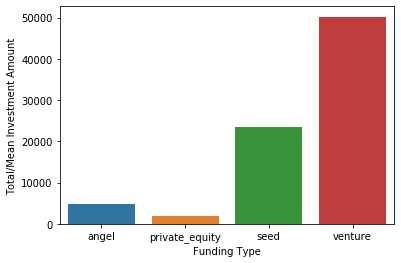

In [248]:
data = [['angel', (4659255123.0/958694.5)], ['private_equity', (141925436105.0/73308593.0)], ['seed', (16989864181.0/719818.0)], ['venture', (590126216876.0/11748949.1)]]
dfg1 = pd.DataFrame(data, columns = ['Funding Type', 'Total/Mean Investment Amount'])
ax = sns.barplot(x="Funding Type", y="Total/Mean Investment Amount", data=dfg1)

In [265]:
dfg1

,Funding Type,Total/Mean Investment Amount
0,angel,4859.999846666
1,private_equity,1936.000000778
2,seed,23602.999898585
3,venture,50228.000126071


In [272]:
top9

,country_code,raised_amount_usd
0,USA,422510842796.0
1,CHN,39835418773.0
2,GBR,20245627416.0
3,IND,14391858718.0
4,CAN,9583332317.0
5,FRA,7259536732.0
6,ISR,6907514579.0
7,DEU,6346959822.0
8,JPN,3363676611.0


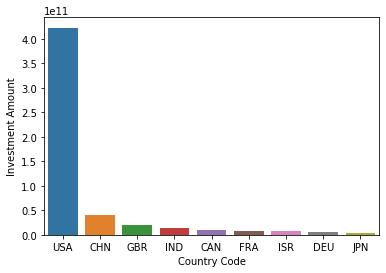

In [275]:
top9.columns = ['Country Code', 'Investment Amount']
ax = sns.barplot(x='Country Code', y='Investment Amount', data=top9)

In [276]:
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge,primary_sector,investment_count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both,Entertainment,
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both,"News, Search and Messaging",
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,both,"News, Search and Messaging",
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,both,"News, Search and Messaging",
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,both,Others,
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,both,Cleantech / Semiconductors,
6,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both,NA,
7,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both,NA,
8,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,both,NA,
9,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,both,"News, Search and Messaging",
